# SVM for classification

Load IRIS dataset, check its contents:


In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.feature_names)
print(iris.data[:5, :])
print(iris.target[:5])


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split data into training and testing parts:

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np

X = iris.data
y = iris.target

# keep only classes 0 and 1 
mask = (y != 2)
X = X[mask]
y = y[mask]

# keep only the 2 first column
X = X[:, :2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train:", X_train.shape)
print("Test :", X_test.shape)
print("Classes:", np.unique(y))


Train: (80, 2)
Test : (20, 2)
Classes: [0 1]


Use a Support Vector Machine for classification:


In [3]:
from sklearn.svm import SVC

SVMmodel = SVC(kernel='linear', C=1)  
SVMmodel.fit(X_train, y_train)

print("Accuracy:", SVMmodel.score(X_test, y_test))



Accuracy: 1.0


Let's explore more now. 

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



Plot scatterplots of targets 0 and 1 and check the separability of the classes:

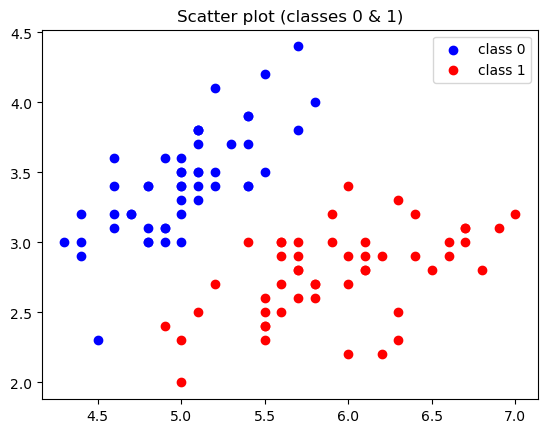

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X[y==0, 0], X[y==0, 1], color='blue', label='class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], color='red', label='class 1')

plt.legend()
plt.title("Scatter plot (classes 0 & 1)")
plt.show()



Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

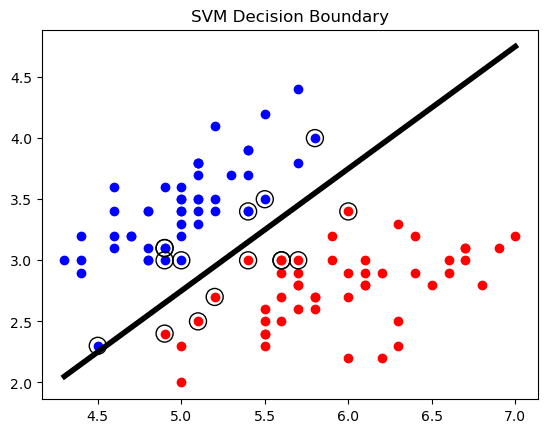

In [5]:
import numpy as np

supvectors = SVMmodel.support_vectors_

# Points (BLEU & ROUGE)
plt.scatter(X[y==0, 0], X[y==0, 1], color='blue')
plt.scatter(X[y==1, 0], X[y==1, 1], color='red')

# Support vectors (cercles noirs)
plt.scatter(supvectors[:, 0], supvectors[:, 1],
            s=150, facecolors='none', edgecolors='black')

# Droite de décision
w = SVMmodel.coef_[0]
b = SVMmodel.intercept_[0]

x_line = np.linspace(X[:, 0].min(), X[:, 0].max(), 200)
y_line = -(w[0]*x_line + b) / w[1]

plt.plot(x_line, y_line, color='black', linewidth=4)

plt.title("SVM Decision Boundary")
plt.show()




# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

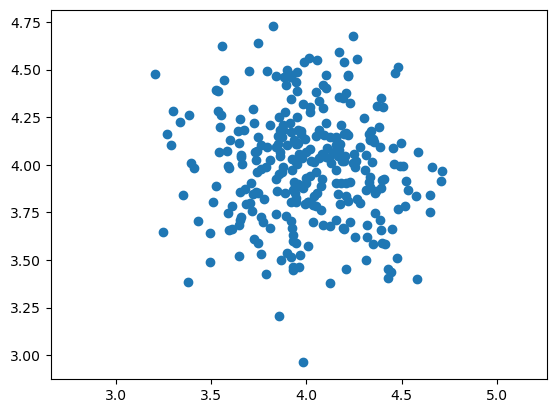

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:, 0], x[:, 1])
plt.axis("equal")
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

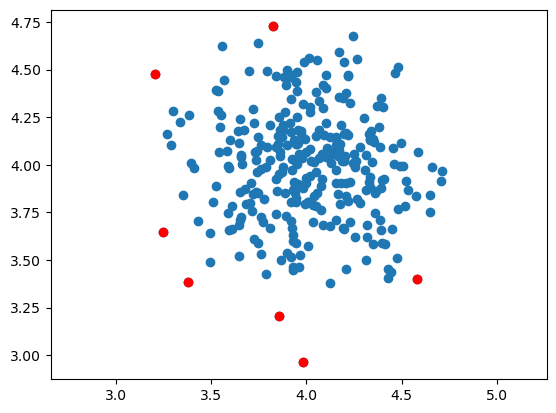

In [7]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)

SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)

anom_index = where(pred == -1)
values = x[anom_index]

plt.scatter(x[:, 0], x[:, 1])
plt.scatter(values[:, 0], values[:, 1], color='red')
plt.axis('equal')
plt.show()




Plot the support vectors:

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

threshold: 8.987833799021839


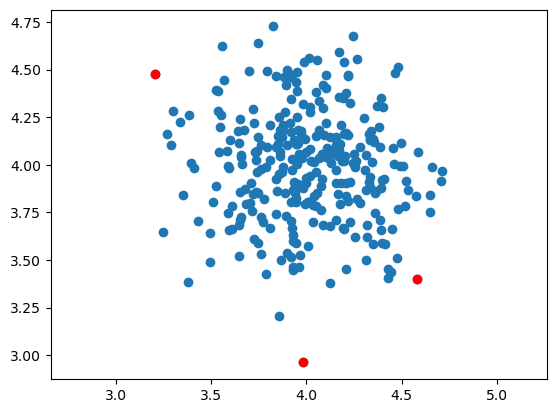

In [8]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.01)  
print("threshold:", thresh)

index = where(scores <= thresh)
values = x[index]

plt.scatter(x[:, 0], x[:, 1])
plt.scatter(values[:, 0], values[:, 1], color='red')
plt.axis('equal')
plt.show()
